In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("./train.csv")
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


199 vips sur 8693


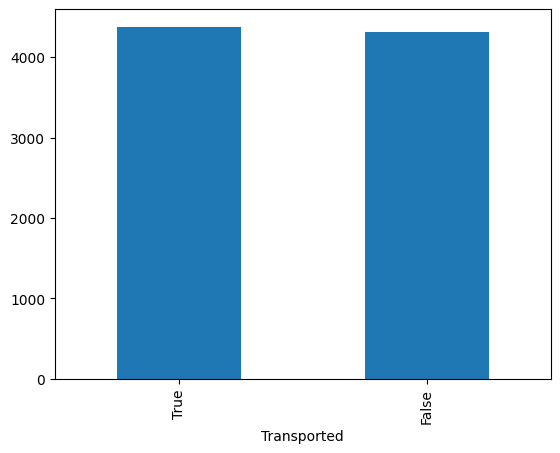

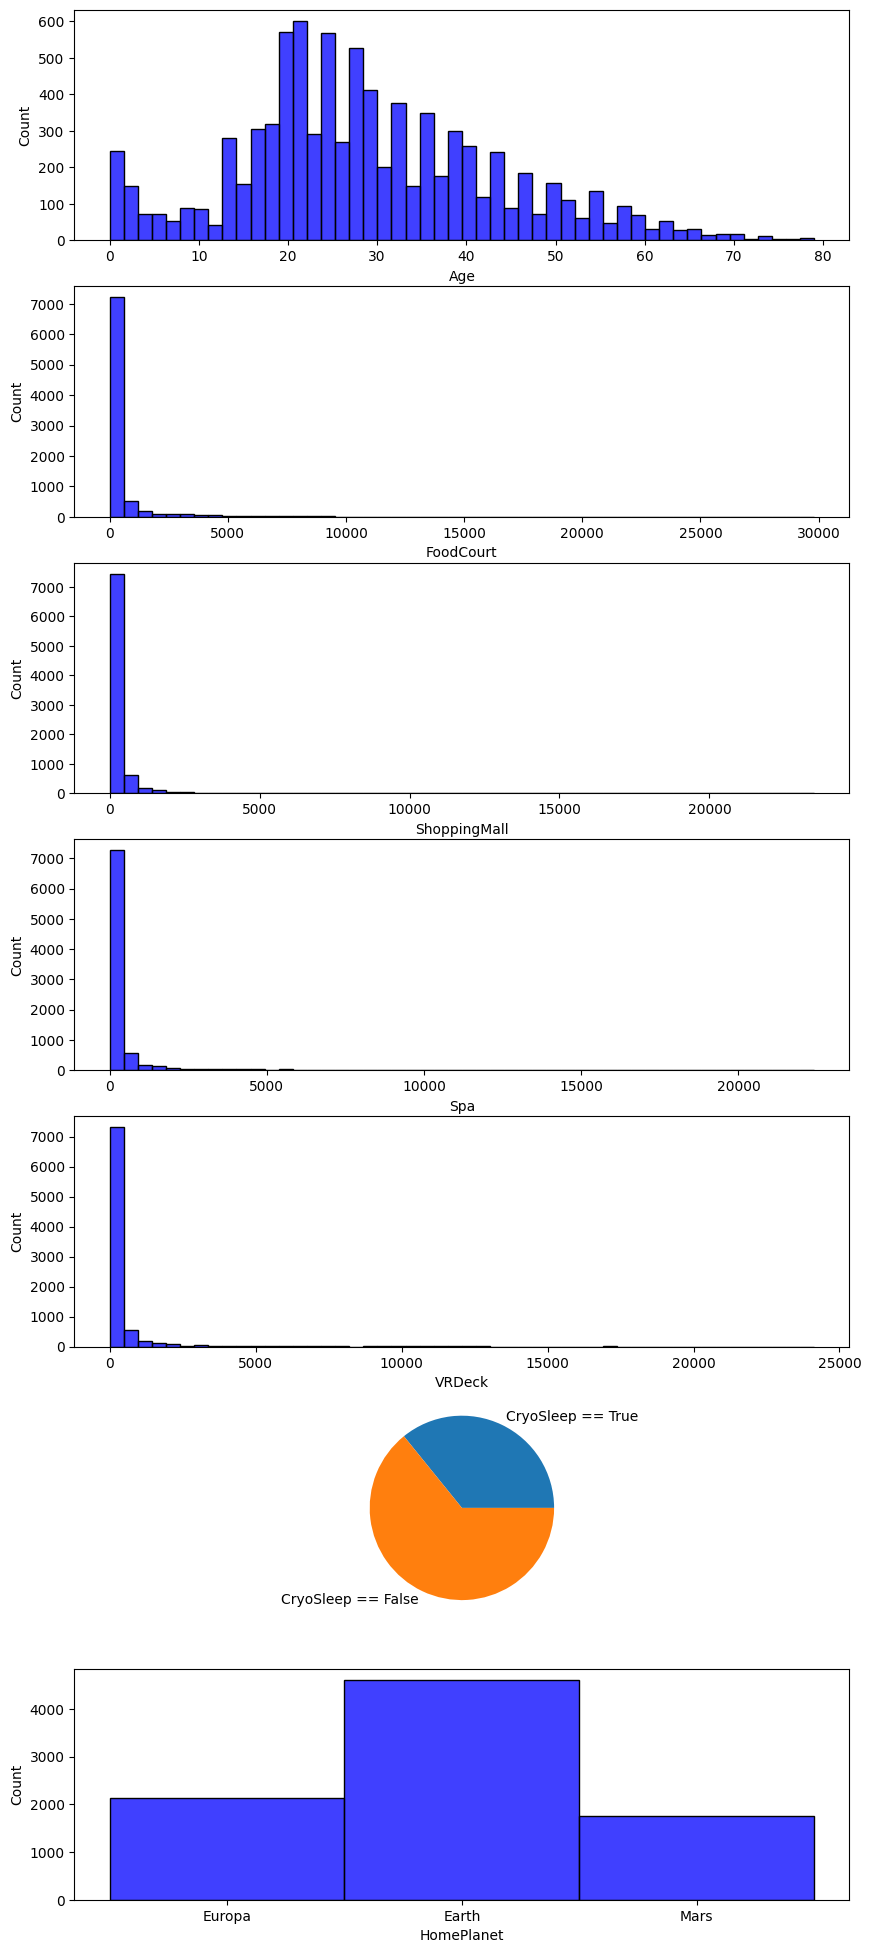

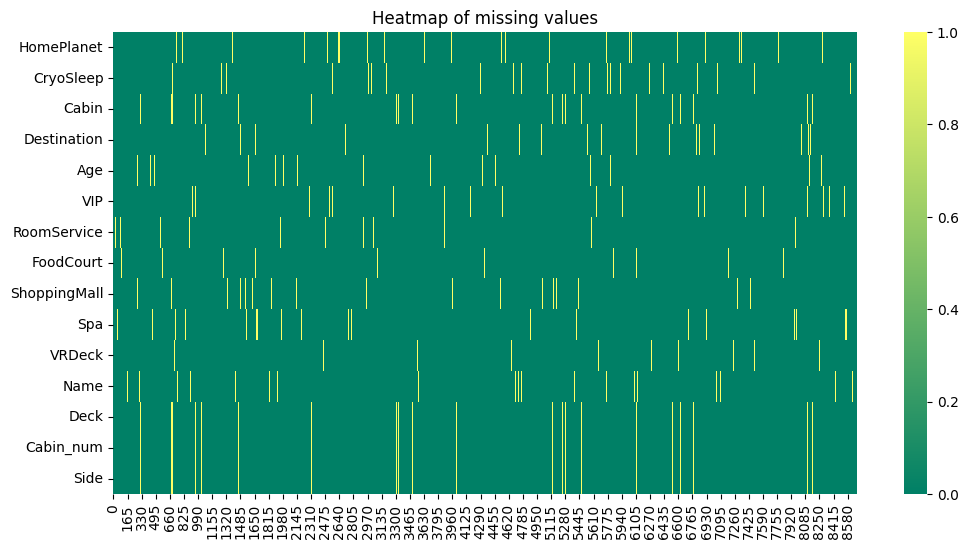

In [3]:
# Statistiques sur le dataset entier

plot_df = dataset.Transported.value_counts()
plot_df.plot(kind="bar")

fig, ax = plt.subplots(7,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(dataset['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(dataset['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(dataset['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(dataset['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(dataset['VRDeck'], color='b', bins=50, ax=ax[4]);
ax[5].pie([len(dataset.loc[dataset['CryoSleep'] == True]), len(dataset.loc[dataset['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(dataset['HomePlanet'], color='b', bins=50, ax=ax[6])

dataset[['Deck', 'Cabin_num', 'Side']] = dataset['Cabin'].str.split('/', expand=True)

# Heatmap of missing values
na_cols=dataset.columns[dataset.isna().any()].tolist()
plt.figure(figsize=(12,6))
sns.heatmap(dataset[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

print(len(dataset.loc[dataset['VIP'] == True]), "vips sur", len(dataset))

Statistiques sur les personnes ayant été transportées
76 vips sur 4378


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4288.000000,4295.000000,4279.000000,4264.000000,4287.000000,4280.000000
mean,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131
std,15.151705,274.812497,1931.306995,722.026714,262.682871,291.658171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,78.000000,3992.000000,29813.000000,23492.000000,4103.000000,5063.000000


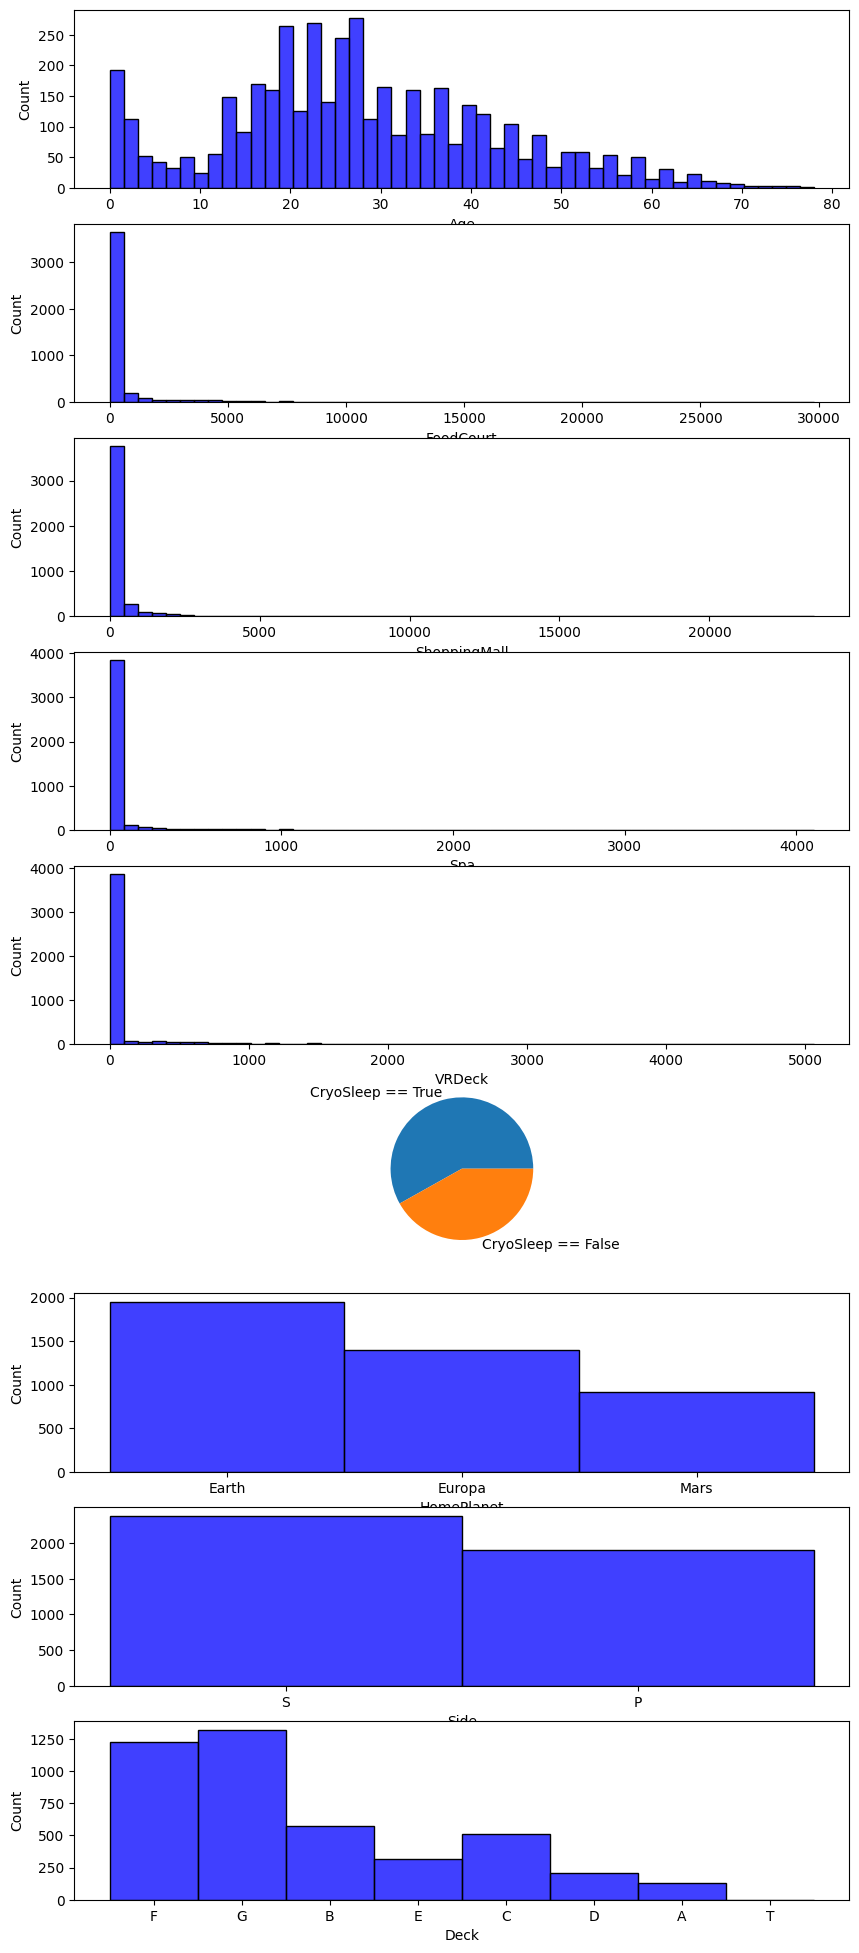

In [4]:
# Statistiques sur les personnes ayant été transportées

true_df = dataset.loc[dataset["Transported"] == True]

print("Statistiques sur les personnes ayant été transportées")

fig, ax = plt.subplots(9,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(true_df['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(true_df['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(true_df['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(true_df['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(true_df['VRDeck'], color='b', bins=50, ax=ax[4])
ax[5].pie([len(true_df.loc[true_df['CryoSleep'] == True]), len(true_df.loc[true_df['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(true_df['HomePlanet'], color='b', bins=50, ax=ax[6])

sns.histplot(true_df['Side'], color='b', bins=2, ax=ax[7])
sns.histplot(true_df['Deck'], color='b', ax=ax[8])

print(len(true_df.loc[true_df['VIP'] == True]), "vips sur", len(true_df))

true_df.describe()

Statistiques sur les personnes n'ayant pas été transportées
123 vips sur 4315


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4226.000000,4217.000000,4231.000000,4221.000000,4223.000000,4225.000000
mean,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822
std,13.699262,875.638123,1200.115601,456.528126,1551.356047,1563.088368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,0.000000,4.000000,1.000000
75%,38.000000,473.000000,179.000000,95.000000,453.500000,388.000000
max,79.000000,14327.000000,16856.000000,10705.000000,22408.000000,24133.000000


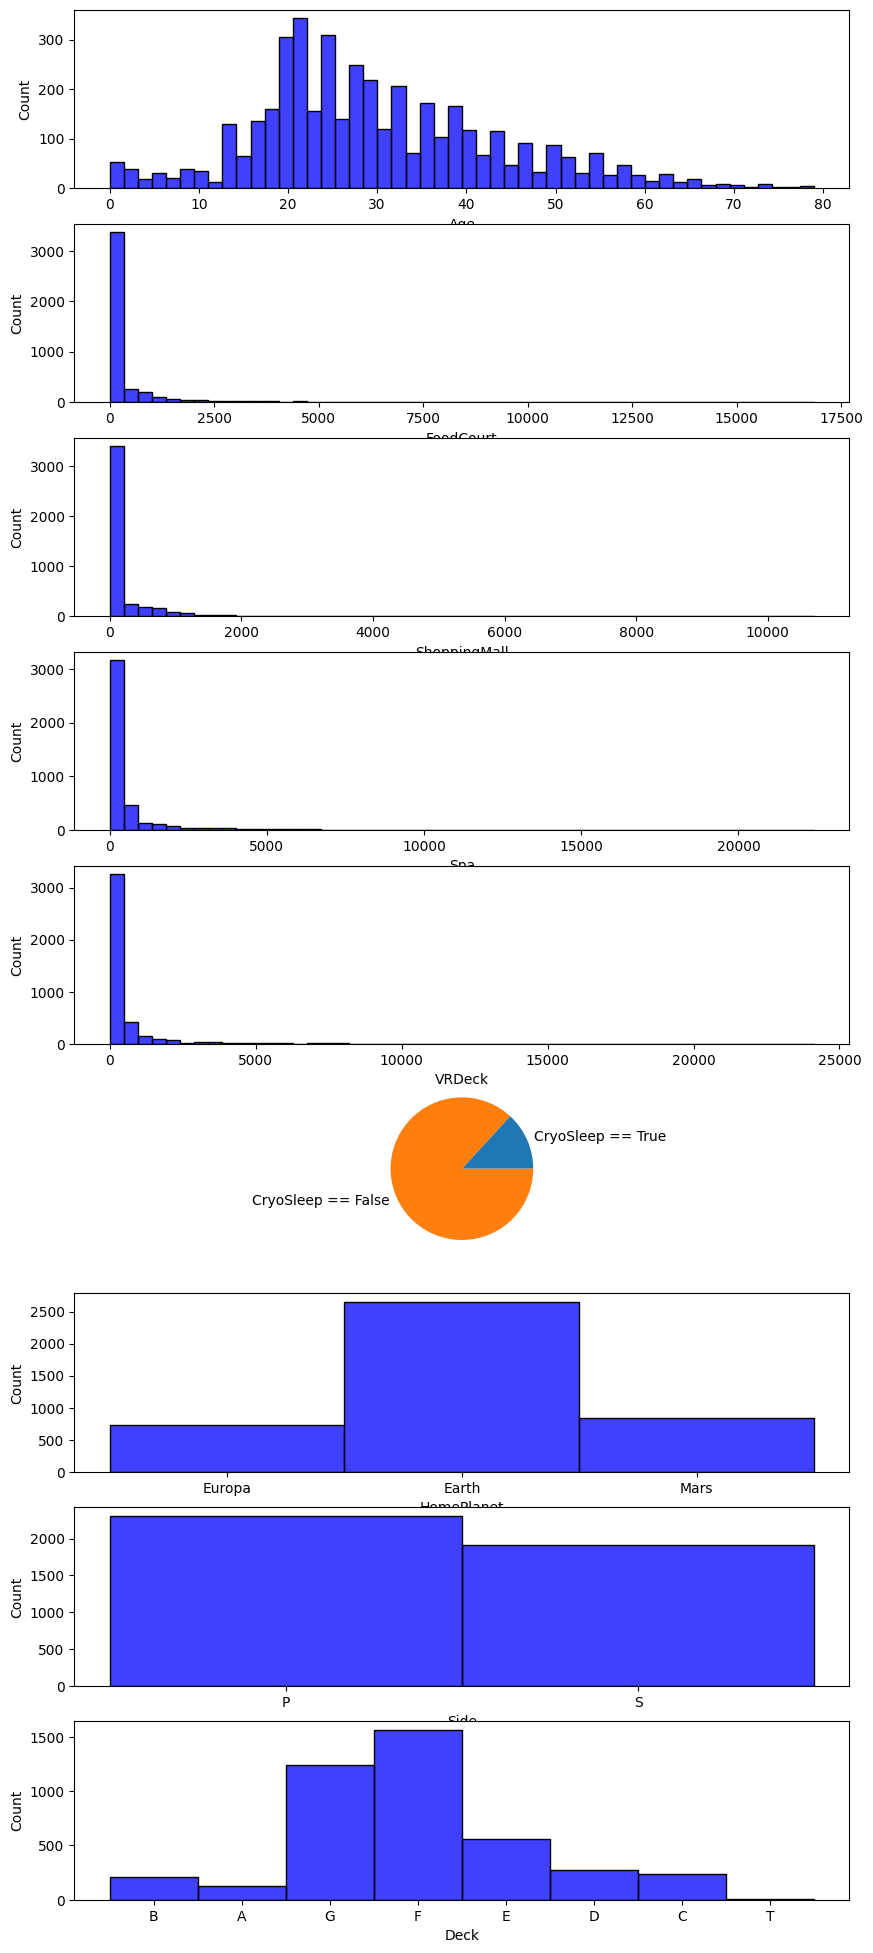

In [5]:
# Statistiques sur les personnes n'ayant pas été transportées

false_df = dataset.loc[dataset["Transported"] == False]

print("Statistiques sur les personnes n'ayant pas été transportées")

fig, ax = plt.subplots(9,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(false_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(false_df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(false_df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(false_df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(false_df['VRDeck'], color='b', bins=50, ax=ax[4]);
ax[5].pie([len(false_df.loc[false_df['CryoSleep'] == True]), len(false_df.loc[false_df['CryoSleep'] == False])], labels=["CryoSleep == True", "CryoSleep == False"])
sns.histplot(false_df['HomePlanet'], color='b', bins=50, ax=ax[6])

sns.histplot(false_df['Side'], color='b', bins=2, ax=ax[7])
sns.histplot(false_df['Deck'], color='b', ax=ax[8])

print(len(false_df.loc[false_df['VIP'] == True]), "vips sur", len(false_df))

false_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Cabin_num     8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB
None


<Axes: xlabel='HomePlanet', ylabel='Destination'>

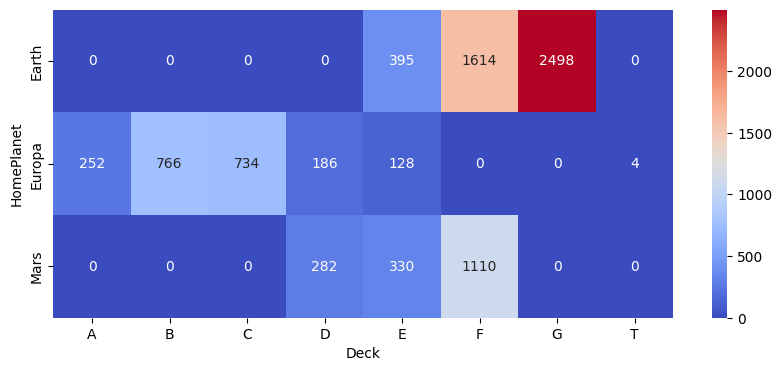

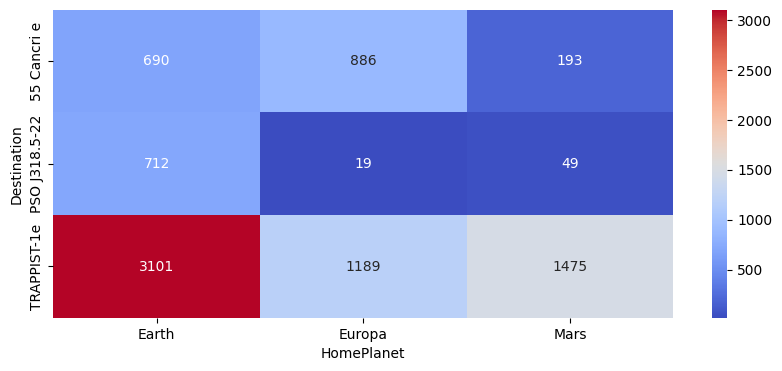

In [6]:
print(dataset.info())

# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=dataset.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')



# Joint distribution of HomePlanet and Destination
HPD_gb=dataset.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Cabin_num     8693 non-null   int64  
 16  Side          8494 non-null   object 
dtypes: bool(1), float64(6), int64(1), object(9)
memory usage: 1.1+ MB
None


(0.0, 2000.0)

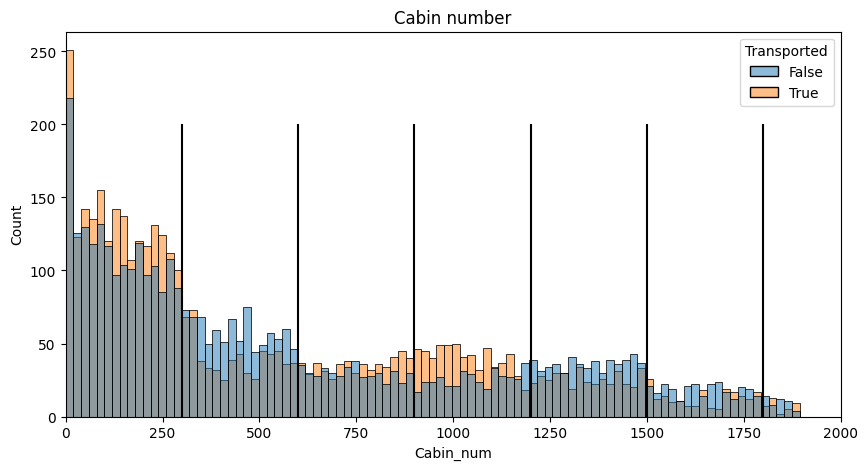

In [7]:
fig=plt.figure(figsize=(10,5))

dataset['Cabin_num'] = dataset['Cabin_num'].fillna(0).astype(int)

print(dataset.info())

sns.histplot(data=dataset, x='Cabin_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

In [37]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
dataset['NoSpending']  = (dataset['Expenditure']==0).astype(int)

for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
    print(deck, dataset[dataset['Deck'] == deck]['NoSpending'].sum() / dataset[dataset['Deck'] == deck]['PassengerId'].count())
    for destination in ['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e']:
        print(deck, destination, dataset[(dataset['Destination'] == destination) & (dataset['Deck'] == deck)]['PassengerId'].count())

A 0.34375
A TRAPPIST-1e 142
A PSO J318.5-22 2
A 55 Cancri e 108
B 0.6046213093709885
B TRAPPIST-1e 426
B PSO J318.5-22 3
B 55 Cancri e 333
C 0.4323962516733601
C TRAPPIST-1e 405
C PSO J318.5-22 13
C 55 Cancri e 317
D 0.2280334728033473
D TRAPPIST-1e 338
D PSO J318.5-22 17
D 55 Cancri e 113
E 0.2636986301369863
E TRAPPIST-1e 696
E PSO J318.5-22 41
E 55 Cancri e 116
F 0.23407301360057264
F TRAPPIST-1e 2088
F PSO J318.5-22 241
F 55 Cancri e 398
G 0.6565064478311841
G TRAPPIST-1e 1688
G PSO J318.5-22 461
G 55 Cancri e 365
T 0.0
T TRAPPIST-1e 5
T PSO J318.5-22 0
T 55 Cancri e 0


In [64]:
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dataset['Expenditure'] = dataset[exp_feats].sum(axis=1)
dataset['NoSpending']  = (dataset['Expenditure']==0).astype(int)

for side in ['P', 'S']:
    print(deck, dataset[(dataset['Side'] == side)]['NoSpending'].count())

P 4206
P 4288
